# Project 1 Phylogenetics Assigned Problems

In [57]:
# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import pylab

# should check if I need this
import numpy as np

In [58]:
"""
Constructs a transition Matrix with a specified alpha level a
Args:
     a: alpha level for the Jukes Cantor Matrix
Returns:
     Transition Matrix corresponding to the Jukes-Cantor Algorithm
"""

def transition_matrix(a):
    b = a/3
    M = np.array([[1-a, b, b, b],
                 [b, 1-a, b, b],
                 [b, b, 1-a, b],
                 [b, b, b, 1-a]])
    return M

def rand_vector(n):
    a = np.random.rand(n)
    return a/sum(a)

"""
Finds the equilibrium point of a transition Matrix
Args:
    M: the transition Matrix for the Jukes Cantor Algorithm 
Returns:
    The equilibrium point of a transition Matrix
"""

def find_eq(M):
    D, V = np.linalg.eig(M)
    for x in xrange(D.size):
        if abs(D[x] - 1) < .0001:
            return V[:, x]/sum(V[:, x])

"""
Counts the number of time steps until the Jukes-Counter Algorithm
raches a steady state.
Args:
          M: the transition Matrix for the Jukes Cantor Algorithm 
        p_t: the initial probability vector specified by 4.4.3
    epsilon: the acceptable error bound on the equilibrium value

Returns:
    Number of iterations required for the model to converge 
    to within epsilon of the equilibrium value
"""
def counter(epsilon, p_t, M):
    p_eq = find_eq(M)
    def is_within_epsilon(p_t):
        t = True
        for i in xrange(p_t.size):
            t = t and abs(p_eq[i] - p_t[i]) < epsilon
        return t
    count = 0
    while not is_within_epsilon(p_t):
        p_t = M.dot(p_t)
        count += 1
    return count

"""
Performs simulations for a set given probability vectors
Args:
          p:  probability vector
          a:  mutation rate
Returns:
    Number of iterations required for the model to converge 
    to within epsilon of the equilibrium value
"""
def print_sim(p, a = .3):
    M     = transition_matrix(a)
    large = counter(0.05, p, M)
    small = counter(0.01, p, M)
    print('------------------------------------------------------------')
    print('number of iterations to get within epsilon = .05 is:')
    print(large)
    print('-------------------------------------------------------------')
    print('number of iterations to get with epsilon = .01 is:')
    print(small)
    print('-------------------------------------------------------------')


def det_sim(p, eps ,a = .3):
    M     = transition_matrix(a)
    t     = counter(eps, p, M)
    return t
    
    


# Problem 4.4.3

## Problem 4.4.3a)

 How many time steps does it take to reach equillibrium for   $ p_0 = [.2,.3,.4,.1] $

In [59]:
p_0 = np.array([.2,.3,.4,.1])
print_sim(p_0)

------------------------------------------------------------
number of iterations to get within epsilon = .05 is:
3
-------------------------------------------------------------
number of iterations to get with epsilon = .01 is:
6
-------------------------------------------------------------


## Problem 4.4.3b)

Making other choices for $p_0$

In [60]:
p_1 = np.array([.5,.25,.25,0])
print_sim(p_1)

------------------------------------------------------------
number of iterations to get within epsilon = .05 is:
4
-------------------------------------------------------------
number of iterations to get with epsilon = .01 is:
7
-------------------------------------------------------------


In [61]:
p_2 = np.array([.45,.25,.15,.15])
print_sim(p_2)

------------------------------------------------------------
number of iterations to get within epsilon = .05 is:
3
-------------------------------------------------------------
number of iterations to get with epsilon = .01 is:
6
-------------------------------------------------------------


In [62]:
p_3 = np.array([0,.75,.125,.125])
print_sim(p_3)

------------------------------------------------------------
number of iterations to get within epsilon = .05 is:
5
-------------------------------------------------------------
number of iterations to get with epsilon = .01 is:
8
-------------------------------------------------------------


## Problem 4.4.3c) 

Using $p_0 = [.25, .25, .25, .25]$, what do you observe? why?

In [63]:
p_0 = np.array([.25,.25,.25,.25])
print_sim(p_0)

------------------------------------------------------------
number of iterations to get within epsilon = .05 is:
0
-------------------------------------------------------------
number of iterations to get with epsilon = .01 is:
0
-------------------------------------------------------------


 ###### Explanation:

We are already at the equillibrium state, therefore it does not take any time steps to reach equilibrium

## Problem 4.4.3d)

Using $p_0 = [0,1,0,0]$ what do you observe?  What is the biologocal meaning of this $p_0$? 

In [70]:
p_0 = np.array([0,1,0,0])
print_sim(p_0)

------------------------------------------------------------
number of iterations to get within epsilon = .05 is:
6
-------------------------------------------------------------
number of iterations to get with epsilon = .01 is:
9
-------------------------------------------------------------


 ###### Explanation:

I observe that it takes several more iterations (as compared to  random probability vectors) in this case. Which makes sense, since second entry of $1$ whcich biologically means that our original nucleotide is a $G$ with probability $1$

# Problem 4.4.4)

Investigating the effect of  varying $\alpha$ on the behavior produced by the Jukes-Cantor matrix.
Let $p_0 = (.2, .3 ,.4 ,.1)$ 

## Problem 4.4.4a)

Compare the behavior of the model for $ \alpha = .03$ and $\alpha = .06$. Forwhich value of $\alpha$ does the model approach the equilibrium fastest?

In [71]:
p_0 = np.array([.2,.3,.4,.1])
print_sim(p_0)

------------------------------------------------------------
number of iterations to get within epsilon = .05 is:
3
-------------------------------------------------------------
number of iterations to get with epsilon = .01 is:
6
-------------------------------------------------------------


In [72]:
p_0 = np.array([.2,.3,.4,.1])
print_sim(p_0,0.6)

------------------------------------------------------------
number of iterations to get within epsilon = .05 is:
1
-------------------------------------------------------------
number of iterations to get with epsilon = .01 is:
2
-------------------------------------------------------------


The algorithm aproaches equilibrium much more quickly with the higher mutation rate of 0.6

## Problem 4.4.4b)

Does your observation in part $(a)$ hold for other initial choices of
$p_0$?

(array([  23.,  601.,  126.,    0.,    0.,    0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Patch objects>)

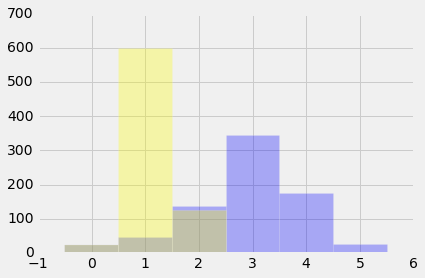

In [73]:
n      = 750
sims_3 = np.zeros(n)
sims_6 = np.zeros(n)

for i in xrange(n):
    p         = rand_vector(4)
    sims_3[i] = det_sim(p,.05,.3)

for j in xrange(n):
    p         = rand_vector(4)
    sims_6[j] = det_sim(p,.05,.6)

max_bin = max(np.amax(sims_3),np.amax(sims_6)) + 1

plots.hist(sims_3,  bins = np.arange(-0.5,max_bin), alpha =.3, color ="blue")
plots.hist(sims_6,  bins = np.arange(-0.5,max_bin), alpha =.3, color = "yellow")

From the above graph we see that the yellow bars indicate that for random probability vectors the higher mutation rate ($\alpha$) namely $\alpha = 0.6$ converges much more quickly than the smaller mutation rate $\alpha = 0.3$. 

## Problem 4.4.4c)


Explain in intuitive terms why larger values of α should result in a quicker approach to the equilibrium.


**Explanation:**
Intuitively it makes since that if the mutation rate is higher then the system will reach its equillibrium more quickly.

# Problem 4.5.12

The Jukes-Cantor distance is an estimate of the number of mutations
that occurred per site over the course of one sequence evolving from
another. A simpler estimate for this number is just p, the proportion
of sites that have changed from the initial to final sequence. Complete the following Excercises: 

## Problem 4.5.12 a)

Explain why multiple mutations at the same site would cause p to be less reliable. Does it give an overestimate or underestimate of the true amount of mutation?

**Explanation:**  
$\textit{p}$ is less reliable, because more mutations at the same site means there's a larger possibility for hidden mutations we won't be able to detect, especially if they are reversed. Thus, this gives an underestimate of the true amount of mutation.


## Problem 4.5.12 b)

Give an intuitive explanation of why, if p is relatively small, so that
the sequences have few differences, this simpler estimate might be
reasonable anyway.

**Explanation:**If $\textit{p}$ is small, then this implies there were few mutations at that specific site, and thus less hidden mutations. If there are less hidden mutations, then the estimate would be pretty reasonable.

## Problem 4.5.12 c)

Explain why part (b) is consistent with the Jukes-Cantor model. That is, explain why for small $\textit{p}$:
$$
\begin{equation*}
\frac{3}{4} \ln (1-\frac{4}{3}p) \approx p
\end{equation*}
$$

by using the approximation for $ln(1 + x)$ valid for small $x$.


**Explanation:** For small $\textit{p}$, the equation holds for mutations converging to a stable distribution of base pairs which is consistent with the Jukes- Cantor model.

## Problem 4.5.12 d)

It has been claimed that, if $\textit{p}$ is less than $.1$, it can be used as a reasonable approximation of the Jukes-Cantor distance. Do you agree? Illustrate by graphing both

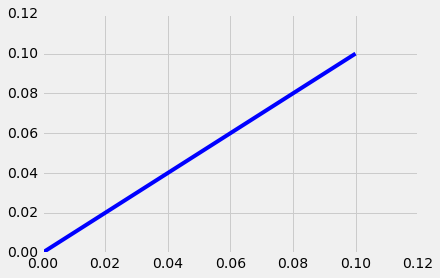

In [74]:
# Got graphing help from stack overflow
x = np.linspace(0,.1,100) # 100 linearly spaced numbers
y = x - (3/4*np.log(1-4/3*x)) # computing the values of sin(x)/x

# compose plot
pylab.plot(x,y,'blue') 
pylab.show() 

From the above plot of the erro we see that the error of estimating:
$$
\begin{equation*}
\frac{3}{4} \ln (1-\frac{4}{3}p) \approx p
\end{equation*}
$$
is at most 0.1

# Problem 5.1.3) 

Draw all 3 topologically distinct unrooted bifurcating trees that could describe the relationship between 4 taxa. Then draw all 15 topologically distinct rooted bifurcating trees that could describe the relationship between 4 taxa.

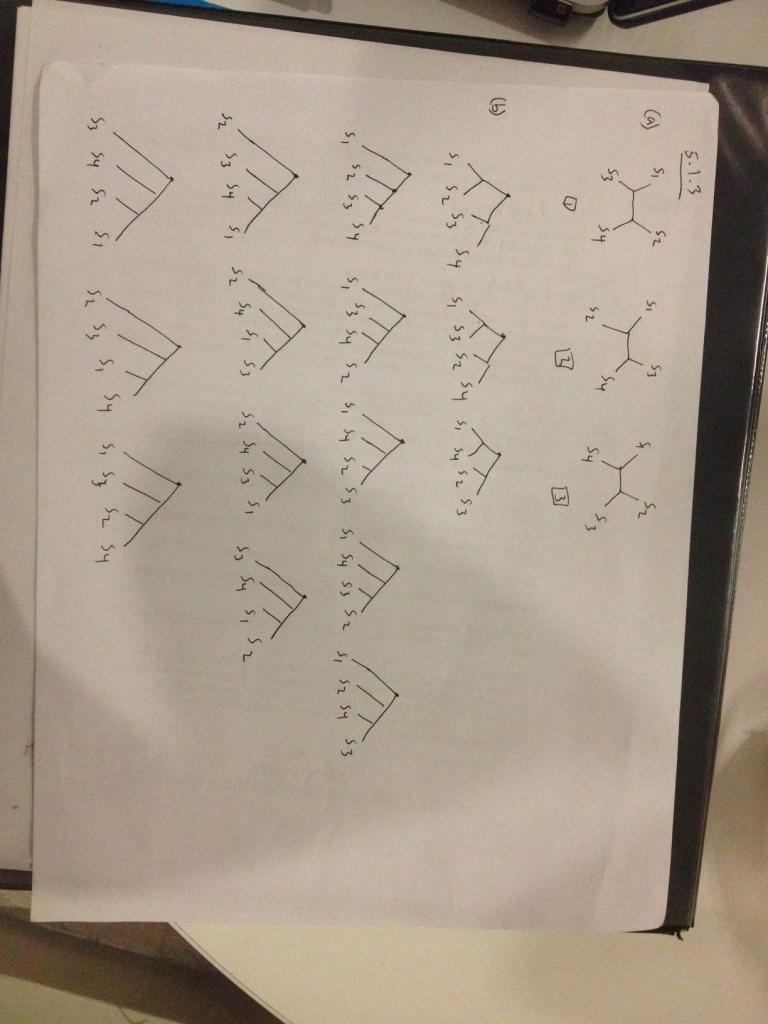

In [75]:
import IPython.display 
art  = IPython.display.Image("http://i.imgur.com/TPbeDyl.jpg")
art

# Problem 5.1.7) 

Because mitochondrial DNA in humans is inherited solely from the
mother, it can be used to construct a tree relating any number of humans
from different ethnic groups, assuming we all descended from a single
first human female. Depending on the clustering pattern of the ethnic
groups, this might give insight into the physical location of this woman
sometimes called Mitochondrial Eve.
In (Cann et al., 1987), a work that first purported to locate Mitochondrial
Eve in Africa, supporting the “out of Africa” theory of human
origins, a rooted treewas constructed thatwas claimed to showthe relationships
between $147$ individuals. How many topologically different
trees would need to be looked at if every possibility was really examined?
(You may need to use Stirling’s formula: $n! ∼ \sqrt(2πnn+12e−n)$.
Here, the symbol “∼” can be interpreted as “is approximately.”)
See (Gibbons, 1992) for the fall-out from the difficulty of considering
so many trees.

**Computation**: Inserting stirling formula simplification into wolfram alpha we get:
$$
4.889821539664617634314362008881868235921712712963362... \times 10^{296} 
$$